# 911 Calls - Data cleaning & EDA Training

Celia Parejo Aranda (April-2019)

We are going to clean and explore some 911 call data from Kaggle, which contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode (código postal)
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

**Our goal with this analysis will include giving answers to the following questions:**

* What were the most common types of emergencies?

* Where did these calls come from? (Where were they made in the highest quantity?)

* Is there a relationship between the township and certain kinds of emergencies?

* Were 911 calls more frequent at certain months?

* What were the days and hours with the highest number of emergencies?

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv('911.csv')

___
## Data overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**Let's check if we have any missing data:**

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
total

zip          12855
addr           519
twp             43
e                0
timeStamp        0
title            0
desc             0
lng              0
lat              0
dtype: int64

In [7]:
percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
pd.concat([total, percent], axis = 1, keys= ['Total', 'Percent'])

,Total,Percent
zip,12855,12.92
addr,519,0.52
twp,43,0.04
e,0,0.00
timeStamp,0,0.00
title,0,0.00
desc,0,0.00
lng,0,0.00
lat,0,0.00


It seems we have missing values in three columns: zip code, address and township, and the quantity is specially important in the first one.

In [8]:
df['twp'].unique()

array(['NEW HANOVER', 'HATFIELD TOWNSHIP', 'NORRISTOWN',
       'LOWER POTTSGROVE', 'LANSDALE', 'HORSHAM', 'SKIPPACK',
       'LOWER SALFORD', 'PLYMOUTH', 'MONTGOMERY', 'UPPER MORELAND',
       'CHELTENHAM', 'UPPER MERION', 'WHITEMARSH', 'UPPER GWYNEDD',
       'LOWER PROVIDENCE', 'UPPER DUBLIN', 'WHITPAIN', 'DELAWARE COUNTY',
       'FRANCONIA', 'WEST CONSHOHOCKEN', 'LOWER MERION', 'LIMERICK',
       'TOWAMENCIN', 'DOUGLASS', 'POTTSTOWN', 'BRIDGEPORT', 'AMBLER',
       'CHESTER COUNTY', 'UPPER HANOVER', 'SPRINGFIELD', 'ROCKLEDGE',
       'ABINGTON', 'WEST NORRITON', 'ROYERSFORD', 'UPPER SALFORD',
       'LOWER MORELAND', 'CONSHOHOCKEN', 'PENNSBURG', 'TELFORD',
       'EAST NORRITON', 'UPPER FREDERICK', 'UPPER PROVIDENCE', 'SALFORD',
       'HATFIELD BORO', 'LEHIGH COUNTY', 'LOWER GWYNEDD', 'MARLBOROUGH',
       'BRYN ATHYN', 'HATBORO', 'WORCESTER', 'COLLEGEVILLE',
       'SCHWENKSVILLE', 'PERKIOMEN', 'SOUDERTON', 'UPPER POTTSGROVE',
       'LOWER FREDERICK', nan, 'BUCKS COUNTY', 'RED 

In [9]:
df.e.unique()

array([1], dtype=int64)

As it is a constant, we could drop the 'e' column. Regarding to the missing values in 'zipcode', 'address' and 'township', we will not make use of the first nor the second of the mentioned variables in this analysis, so we can simply let them be. As far as 'township' is concerned, I see no easy way to complete the data, and, anyway, this is simply an exploratory analysis training, so I will not worry about its missing values either.


**Let's turn the timeStamp into DateTime objects so that it is easier to work with them:**

In [10]:
df.timeStamp = pd.to_datetime(df.timeStamp)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null datetime64[ns]
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.8+ MB


**In order to have the data tidier, let's create a new column to  hold the main reason for each call (EMS, Fire or Traffic) called General Reason ('GenReason'), and another one for the specific cause, named Specific Reason ('SpReason'):**

In [12]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [13]:
df['GenReason'] = df['title'].apply(lambda x: x.split(':')[0])
df['GenReason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: GenReason, dtype: object

In [14]:
df['SpReason'] = df['title'].apply(lambda x: x.split(':')[1])
df['SpReason'].head()

0      BACK PAINS/INJURY
1     DIABETIC EMERGENCY
2          GAS-ODOR/LEAK
3      CARDIAC EMERGENCY
4              DIZZINESS
Name: SpReason, dtype: object

In [15]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,GenReason,SpReason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


**And we drop the original 'Title' variable':**

In [16]:
df.drop('title', axis = 1)

,lat,lng,desc,zip,timeStamp,twp,addr,e,GenReason,SpReason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,HEAD INJURY
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,NAUSEA/VOMITING
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,RESPIRATORY EMERGENCY
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,SYNCOPAL EPISODE
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,VEHICLE ACCIDENT -


**Great. Now: we know we only have three possible General Reasons, but how many different Specific Reasons for calling are there?**

In [17]:
df.SpReason.nunique()
# We could have also used: len(df.SpReason.unique())

81

It looks like there are 76 possible causes for calling in our dataset. Here we can see 20 of them:

In [18]:
df.SpReason.value_counts().head(20)

 VEHICLE ACCIDENT -           23066
 DISABLED VEHICLE -            7702
 VEHICLE ACCIDENT              5573
 FIRE ALARM                    5510
 RESPIRATORY EMERGENCY         5112
 CARDIAC EMERGENCY             5012
 FALL VICTIM                   4863
 ROAD OBSTRUCTION -            3144
 SUBJECT IN PAIN               2687
 HEAD INJURY                   2631
 UNKNOWN MEDICAL EMERGENCY     1874
 SYNCOPAL EPISODE              1718
 SEIZURES                      1630
 FIRE INVESTIGATION            1478
 GENERAL WEAKNESS              1464
 ABDOMINAL PAINS               1436
 ALTERED MENTAL STATUS         1386
 MEDICAL ALERT ALARM           1344
 HEMORRHAGING                  1259
 CVA/STROKE                    1202
Name: SpReason, dtype: int64

It seems some causes, such as 'vehicle accidents', are grouped into two different groups due to a mistake with a ' -' even though they are the same. 

**Let's correct it:**

In [19]:
def correct_reason(x):
        if x.endswith('-'):
            return x[:-2]
        else:
            return x

In [20]:
df['SpReason'] = df['SpReason'].apply(lambda x: correct_reason(x))

**Now we check if the correction worked:**

In [54]:
df.SpReason.value_counts().head(20)

 VEHICLE ACCIDENT             28639
 DISABLED VEHICLE              7703
 FIRE ALARM                    5510
 RESPIRATORY EMERGENCY         5112
 CARDIAC EMERGENCY             5012
 FALL VICTIM                   4863
 ROAD OBSTRUCTION              3144
 SUBJECT IN PAIN               2687
 HEAD INJURY                   2631
 UNKNOWN MEDICAL EMERGENCY     1874
 SYNCOPAL EPISODE              1718
 SEIZURES                      1630
 FIRE INVESTIGATION            1478
 GENERAL WEAKNESS              1464
 ABDOMINAL PAINS               1436
 ALTERED MENTAL STATUS         1386
 MEDICAL ALERT ALARM           1344
 HEMORRHAGING                  1259
 CVA/STROKE                    1202
 OVERDOSE                      1191
Name: SpReason, dtype: int64

It seems like it did. To prove it, we can use the following code:

In [22]:
def res(x):
    if '-' in x:
        return x
    else:
        None

lst = pd.DataFrame(df.SpReason.apply(lambda x:res(x)))
lst[-lst['SpReason'].isnull()].groupby('SpReason').count()

""
SpReason
GAS-ODOR/LEAK
RESCUE - ELEVATOR
RESCUE - GENERAL
RESCUE - TECHNICAL
RESCUE - WATER


Alright. 

**Now, let's see what the most common reasons for 911 calls were (general and specific) according to the data we have:**

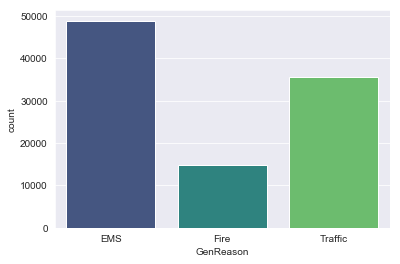

In [57]:
sns.countplot(x = 'GenReason', data = df, palette='viridis')

In [24]:
df.GenReason.value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: GenReason, dtype: int64

In [25]:
df.SpReason.value_counts().head()

 VEHICLE ACCIDENT         28639
 DISABLED VEHICLE          7703
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
 CARDIAC EMERGENCY         5012
Name: SpReason, dtype: int64

It looks like the majority of the 911 calls were related to Emergency Medical Services, whereas vehicle accidents definitely stand out as the most common specific cause for 911 calls.

**Let's deepen and discover the top five reasons for calling inside each general group (EMS, Fire and Traffic):**

In [26]:
df[df.GenReason == 'EMS']['SpReason'].value_counts().head(5)

 RESPIRATORY EMERGENCY    5112
 CARDIAC EMERGENCY        5012
 FALL VICTIM              4863
 VEHICLE ACCIDENT         3935
 SUBJECT IN PAIN          2687
Name: SpReason, dtype: int64

In [27]:
df[df.GenReason == 'Fire']['SpReason'].value_counts().head(5)

 FIRE ALARM            5496
 VEHICLE ACCIDENT      1638
 FIRE INVESTIGATION    1460
 GAS-ODOR/LEAK         1028
 BUILDING FIRE          807
Name: SpReason, dtype: int64

In [28]:
df[df.GenReason == 'Traffic']['SpReason'].value_counts().head(5)

 VEHICLE ACCIDENT             23066
 DISABLED VEHICLE              7702
 ROAD OBSTRUCTION              3144
 HAZARDOUS ROAD CONDITIONS     1086
 VEHICLE FIRE                   553
Name: SpReason, dtype: int64

Here we notice a remarkable detail: vehicle accidents are included in the three groups, and if we added the numbers, we would get that its quantity surpasses any other cause. 

___
**Let's start studying where did most of the calls come from.** 

**Is there any kind of relationship between the township and certain kinds of emergencies? Let's check it:**

In [29]:
town_gen = pd.DataFrame(df[['twp','GenReason']])

town_EMS = town_gen[(town_gen.GenReason == 'EMS')]
town_fire = town_gen[(town_gen.GenReason == 'Fire')]
town_traf = town_gen[(town_gen.GenReason == 'Traffic')]

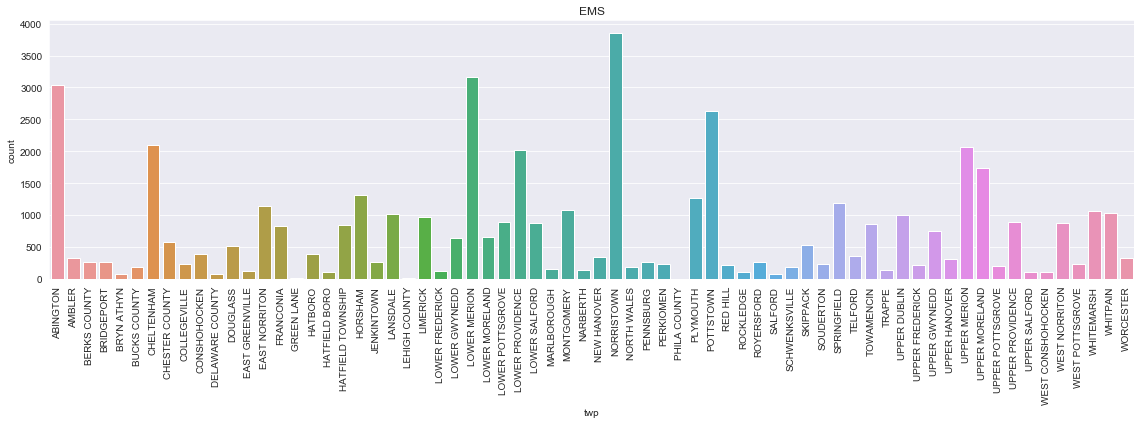

In [30]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'twp', data = town_EMS.sort_values('twp'))
plt.xticks(rotation=90)
plt.title('EMS')
plt.tight_layout()

In [31]:
df[df.GenReason == 'EMS']['twp'].value_counts().head(5)

NORRISTOWN      3858
LOWER MERION    3171
ABINGTON        3043
POTTSTOWN       2635
CHELTENHAM      2098
Name: twp, dtype: int64

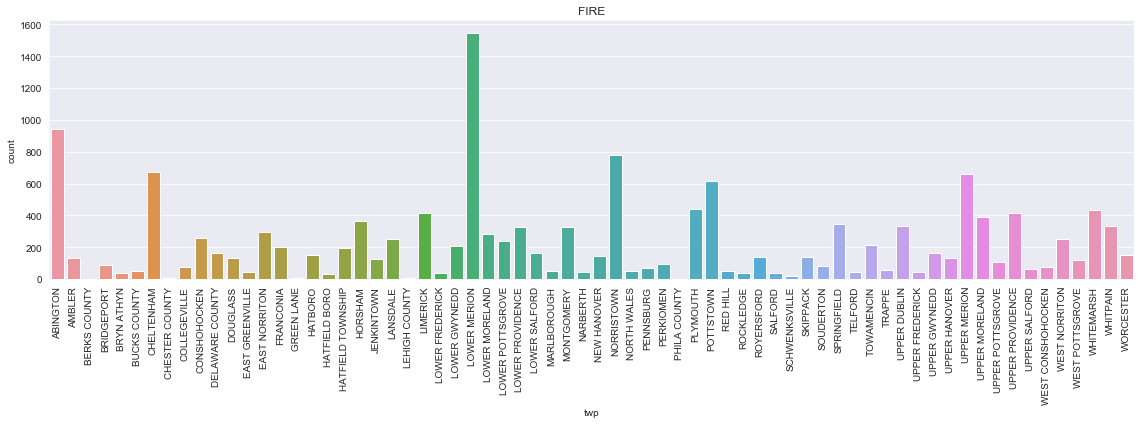

In [32]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'twp', data = town_fire.sort_values('twp'))
plt.xticks(rotation=90)
plt.title('FIRE')
plt.tight_layout()

In [33]:
df[df.GenReason == 'Fire']['twp'].value_counts().head(5)

LOWER MERION    1548
ABINGTON         940
NORRISTOWN       777
CHELTENHAM       674
UPPER MERION     663
Name: twp, dtype: int64

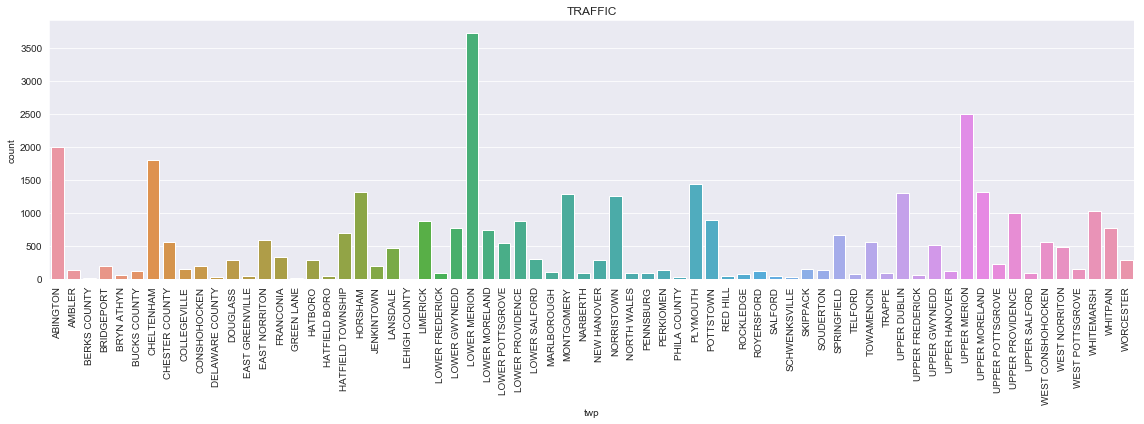

In [34]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'twp', data = town_traf.sort_values('twp'))
plt.xticks(rotation=90)
plt.title('TRAFFIC')
plt.tight_layout()

In [35]:
df[df.GenReason == 'Traffic']['twp'].value_counts().head(5)

LOWER MERION    3724
UPPER MERION    2499
ABINGTON        1994
CHELTENHAM      1803
PLYMOUTH        1442
Name: twp, dtype: int64

According to our results, there are some towns, such as Abington, Cheltenham, also Upper Merion... that really stand out as the ones with the highest number of calls of every kind, and specially Lower Merion, which leads the ranking. It could be interesting to investigate if this fact is related to the size of the towns and, what is more, to the lifestyle of its inhabitants, but we will leave it for, maybe, future analysis.

___
**Let's now focus on time information:**

In [36]:
df['timeStamp'].head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

**We are going to create four new columns based off the timeStamp variable: hour, month, day of week and year**

In [37]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['Year'] = df['timeStamp'].apply(lambda x: x.year)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,GenReason,SpReason,Hour,Month,Day,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,3,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,3,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,17,12,3,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,17,12,3,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,17,12,3,2015


**Let's create a new column based off 'Day' that shows the names of the days of the week instead of integers:**

In [38]:
df['DayOfWeek'] = df['Day'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [39]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,GenReason,SpReason,Hour,Month,Day,Year,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,3,2015,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,3,2015,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,17,12,3,2015,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,17,12,3,2015,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,17,12,3,2015,Thu


**Now, let's explore and see if there is any correlation between the day of the week and the reason for calling:**

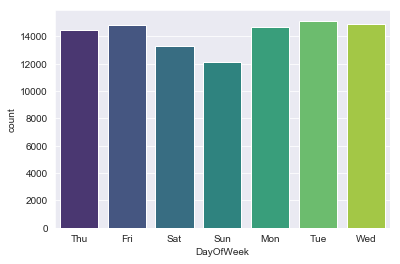

In [40]:
sns.countplot(x = 'DayOfWeek', data = df, palette = 'viridis')

It looks like there was a slightly lower amount of emergency calls at the weekends.

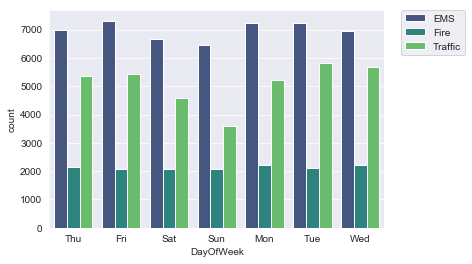

In [41]:
sns.countplot(x = 'DayOfWeek', data = df, hue = 'GenReason', palette = 'viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

EMS and Traffic emergencies follow the same pattern: they were higher in number during the week and tended to decrease at the weekend, whereas the number of calls related to fires were equal no matter the day.

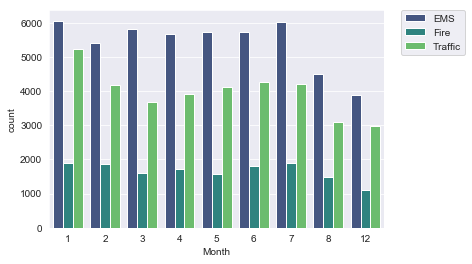

In [42]:
sns.countplot(x = 'Month', data = df, hue = 'GenReason', palette = 'viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

I wanted to explore the distribution of calls along the year, but it looks like some months (9, 10 and 11) are missing? 
In fact, they are not missing, it is just that the data is not ordered correctly: the data from December belongs to the previous year, as we can observe here:

In [43]:
yearmonth = df[['Year', 'Month']].sort_values(['Year', 'Month'])
yearmonth.head()

,Year,Month
0,2015,12
1,2015,12
2,2015,12
3,2015,12
4,2015,12


In [44]:
yearmonth.tail()

,Year,Month
99487,2016,8
99488,2016,8
99489,2016,8
99490,2016,8
99491,2016,8


**Anyway, let's try a different approach:**

In [45]:
df['Date'] = df.timeStamp.apply(lambda x:x.date())

In [46]:
df.Date.head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

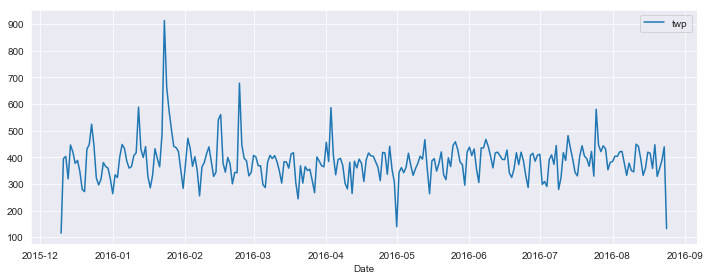

In [47]:
df.groupby('Date').count()['twp'].plot(legend = True, figsize = (10, 4))
plt.tight_layout()

This graph shows a strong peak of calls at the end of January of 2016, and some others. However, we cannot know the reason behind them plotting the information like this.

**Let's recreate this plot in three graphs, one for each main reason for calling to the 911:**

In [48]:
# We could create separate graphs with the following syntax:

# df[df.GenReason == 'EMS']['twp'].groupby(df.Date).count().plot(legend = 
## True, figsize = (10, 4))
# plt.title('EMS')

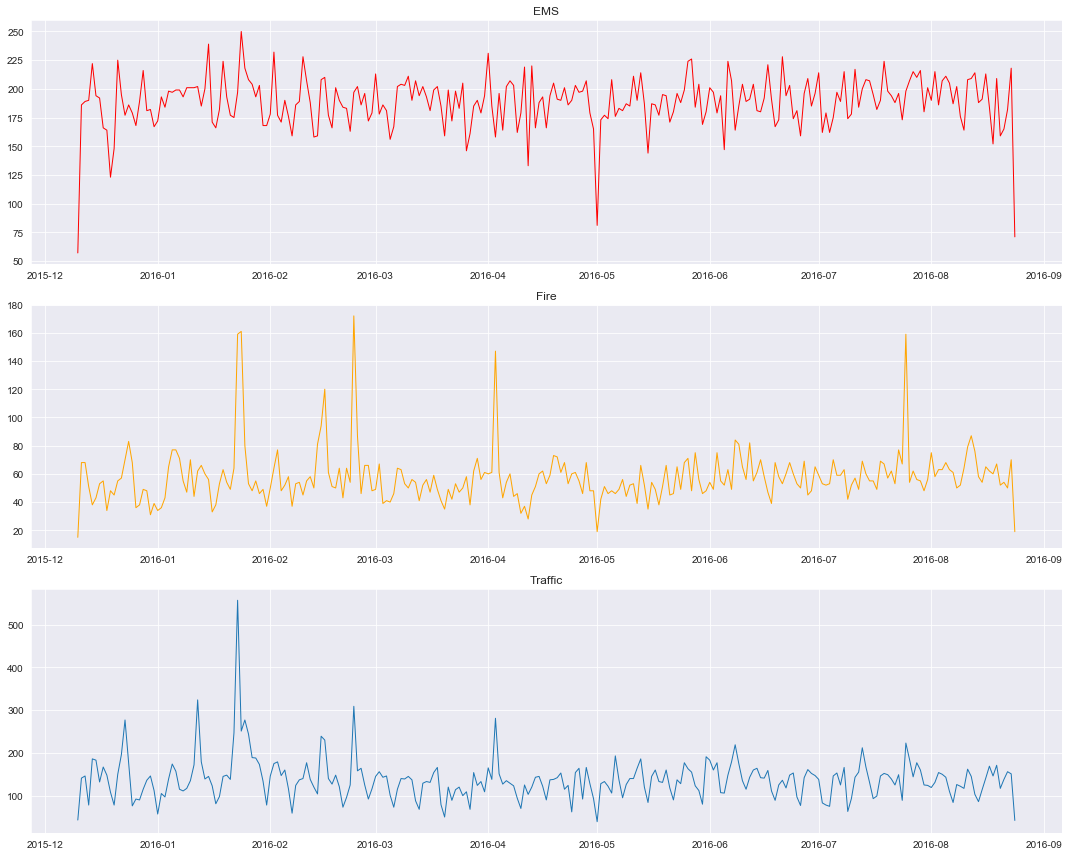

In [49]:
# But I prefer subplots:

a = df[df['GenReason']=='EMS'].sort_values('Date').groupby('Date').count()['twp']
b = df[df['GenReason']=='Fire'].sort_values('Date').groupby('Date').count()['twp']
c = df[df['GenReason']=='Traffic'].sort_values('Date').groupby('Date').count()['twp']
# I use the twp variable just to pick one, but it could be any variable

fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (15,12))

axes[0].plot(a, color = 'red', lw = 1)
axes[1].plot(b, color = 'orange', lw = 1)
axes[2].plot(c, label = 'Traffic', lw = 1)

axes[0].set_title('EMS')
axes[1].set_title('Fire')
axes[2].set_title('Traffic')

plt.tight_layout() 

As we can see, the frequency of EMS calls was more or less the same during the whole year, except for a strong descent in May. If we talk about situations in which fire of fire alarms are involved, there seems to be four or five peaks, whereas there was only one remarkable ascent in Traffic emergencies, at the end of January of 2016.

____
**Finally, we will create some heatmaps to see if we can discover any kind of relationship between certain hours, days and months, and peaks of calls:**

To do that, we will first need to restructure our dataframe:

In [50]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'GenReason', 'SpReason', 'Hour', 'Month', 'Day', 'Year', 'DayOfWeek',
       'Date'],
      dtype='object')

In [51]:
df_pv = df.pivot_table(values='lat', index='DayOfWeek', columns='Hour', aggfunc='count')
df_pv

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


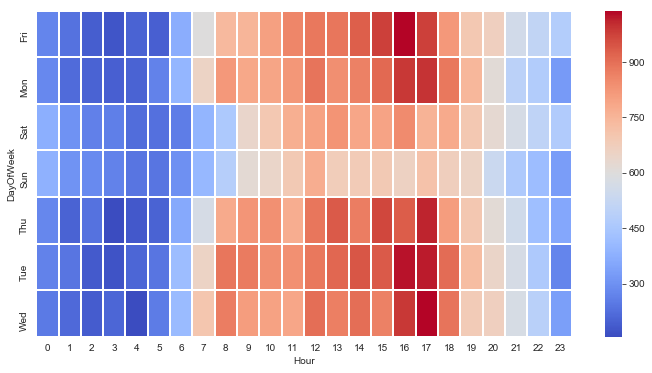

In [52]:
plt.figure(figsize=(12,6))
sns.heatmap(df_pv,cmap='coolwarm',linecolor='white',linewidths=1)

It is clear that the period of time between three and six in the afternoon is the one with the highest number of 911 calls, and there is a detail that may be easier to notice with a clustermap, let's try: 

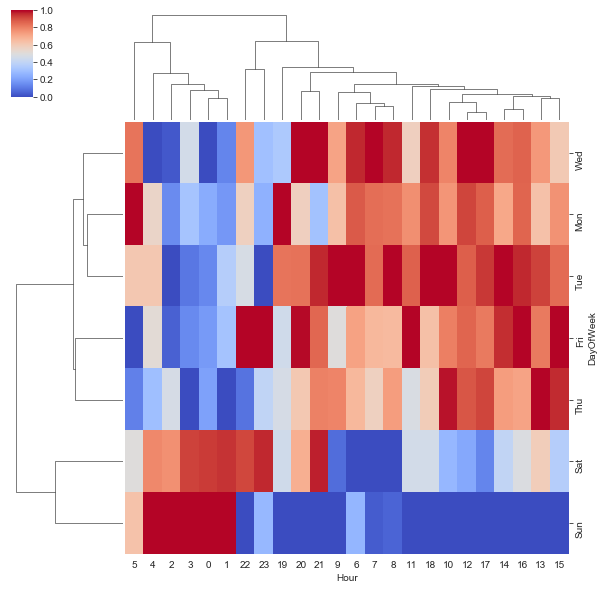

In [53]:
sns.clustermap(df_pv,cmap='coolwarm',standard_scale=1)

Yes. Here, it is clear that, as we already saw in previous graphs, there are less calls during the weekends. And they are not just less, they are also distributed in a completely different manner, being more often during the early morning.

This is the end of this exploratory analysis, I hope I will be able to improve it very soon!